
# LangGraph Unit 2 Tutorial: Advanced State Management and Multi-Node Processing

## Introduction to Advanced LangGraph Patterns

Building on our foundation from Unit 1, Unit 2 takes us deeper into sophisticated state management and multi-node processing patterns. This unit represents the transition from basic conversational agents to production-ready systems that can handle complex workflows, manage memory efficiently, and process information through coordinated pipelines.

### What Makes Unit 2 Special:
- **Advanced State Management:** Go beyond simple message tracking to include summaries, window controls, and custom fields
- **Memory Optimization:** Implement sliding windows and dynamic summarization for long-running conversations
- **Multi-Node Pipelines:** Build sophisticated processing chains with specialized nodes working in harmony
- **Production Patterns:** Learn patterns used in real-world applications

This tutorial consolidates Unit 12 exercises from AI Product Engineer, covering:
1. **Advanced State Management** - Extended fields for context tracking, adding summary and windows size
2. **Message Processing with State Preservation** - Sophisticated message handling
3. **Sliding Window Memory Management** - Efficient conversation history
4. **Dynamic Conversation Summarization** - Context preservation through summaries
5. **Multi-Node Processing Pipelines** - Complex workflow orchestration

### Key Learning Outcomes:
By the end of this tutorial, you'll be able to:
- Design sophisticated state structures for complex applications
- Implement memory-efficient conversation management
- Build multi-stage processing pipelines

## Setting Up Our Environment

Before we dive into advanced patterns, let's ensure our environment is properly configured with all necessary dependencies.


In [1]:
# Install required packages
%pip install langgraph langchain langchain-openai python-dotenv --quiet


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from typing import Annotated, TypedDict, List
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Set API keys
os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

# Import core dependencies
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, SystemMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate


## Exercise 1: Advanced State Management with Extended Fields

Let's start by exploring how to extend our state beyond simple message tracking. This pattern is fundamental for building sophisticated conversational agents that need to maintain various types of context.

### Key Concepts:
- **Extended State Fields**: State can track more than just messages
- **Context Management**: Additional fields enable sophisticated tracking
- **Memory Control**: Window size parameter enables memory management
- **Type Safety**: TypedDict ensures proper field typing

### Why This Matters:
In production applications, you often need to track:
- Conversation summaries for context retention
- User preferences and settings
- Processing metadata and analytics
- Configuration parameters


In [19]:
class State(TypedDict):
    """
    Enhanced state container with context management capabilities.
    
    This implementation demonstrates advanced state management by tracking:
    1. Message history with proper LangGraph annotations
    2. Conversation summaries for context retention
    3. Memory window control for efficient processing
    
    Attributes:
        messages: List of conversation messages with LangGraph's add_messages
                 annotation for proper message handling
        summary: Running summary of the conversation context
        window_size: Control parameter for message history retention
        
    Note:
        The add_messages annotation is crucial for proper message
        handling in LangGraph, ensuring correct state updates while
        the additional fields enable sophisticated conversation management.
    """
    messages: Annotated[list[BaseMessage], add_messages]
    summary: str
    window_size: int


In [20]:
# Example: Working with Advanced State
print("Advanced State Management Example:")
print("-" * 50)

# Initialize state with all fields
state: State = {
    "messages": [],
    "summary": "",
    "window_size": 3
}

# Add messages
state["messages"].append(HumanMessage(content="Tell me about LangGraph"))
state["messages"].append(AIMessage(content="LangGraph is a powerful framework..."))

# Update summary
state["summary"] = "User inquiring about LangGraph framework"

# Display state
print(f"Messages: {len(state['messages'])}")
print(f"Summary: {state['summary']}")
print(f"Window Size: {state['window_size']}")

# Demonstrate window management
if len(state["messages"]) > state["window_size"]:
    # Keep only the last N messages
    state["messages"] = state["messages"][-state["window_size"]:]
    print(f"\nPruned messages to window size: {state['window_size']}")


Advanced State Management Example:
--------------------------------------------------
Messages: 2
Summary: User inquiring about LangGraph framework
Window Size: 3


## Exercise 2: Advanced Message Processing with State Preservation

Now let's create message processing that demonstrates proper state management and field preservation. This is crucial when building systems that need to maintain consistency across state updates.

### Key Concepts:
- **State Preservation**: Always maintain all fields during updates
- **Conditional Processing**: Different logic based on state content
- **Context-Aware Handling**: Use full state context for decisions

### Common Pitfalls to Avoid:
1. Forgetting to preserve non-message state fields
2. Incorrect message type usage
3. Missing empty state handling
4. Improper annotation usage


In [21]:
def process_message(state: State) -> State:
    """Process messages while maintaining conversation context and state.

    This processor demonstrates several advanced concepts:
    1. Full state preservation across updates
    2. Conditional response generation
    3. Context-aware message handling

    The processing follows this flow:
    1. Handle empty state initialization
    2. Process existing messages with context
    3. Preserve non-message state fields

    Args:
        state: Current conversation state containing messages,
              summary, and configuration

    Returns:
        State: Updated state with new messages and preserved fields

    Example:
        >>> initial_state = {"messages": [], "summary": "", "window_size": 3}
        >>> new_state = process_message(initial_state)
        >>> print(new_state["messages"][0].content)
        "Hello!"
    """
    # Initialize state if empty
    if not state["messages"]:
        return {
            "messages": [HumanMessage(content="Hello!")],
            "summary": "",
            "window_size": 3,
        }

    # Process last message with context
    last_message = state["messages"][-1]
    if last_message.content == "Hello!":
        return {
            "messages": [HumanMessage(content="How are you?")],
            "summary": state["summary"],
            "window_size": state["window_size"],
        }

    # Maintain state if no conditions met
    return state

In [22]:
# Test message processing with state preservation
print("\nTesting Message Processing:")
print("-" * 50)

# Test 1: Empty state initialization
initial_state = {"messages": [], "summary": "", "window_size": 5}
result = process_message(initial_state)
print(f"Initial message: {result['messages'][0].content}")
print(f"Summary: {result['summary']}")
print(f"Window preserved: {result['window_size']}")

print("\n" + "-" * 30 + "\n")

# Test 2: Process greeting
greeting_state = {
    "messages": [HumanMessage(content="Hello there!")],
    "summary": "",
    "window_size": 3
}
result = process_message(greeting_state)
print(f"Response to greeting: {result['messages'][-1].content}")
print(f"Updated summary: {result['summary']}")



Testing Message Processing:
--------------------------------------------------
Initial message: Hello!
Summary: 
Window preserved: 3

------------------------------

Response to greeting: Hello there!
Updated summary: 


## Debug Tips

### Message Processing Issues
- Print state before and after processing to verify field preservation
- Check message list length matches window_size configuration  
- Verify message content types (HumanMessage vs AIMessage)

### State Management
- Ensure all required fields are present in state updates
- Validate summary updates maintain proper format
- Monitor window_size compliance

### Common Errors
- **KeyError**: Usually indicates missing state fields
- **TypeError**: Often means incorrect message type usage
- **IndexError**: Check empty message list handling

## Key Takeaways

### State Management
- Always preserve all state fields during updates
- Use proper type annotations for safety
- Maintain consistency in field updates

### Message Processing
- Handle empty states explicitly
- Process messages with full context
- Implement clear processing logic

## Common Pitfalls
- Forgetting to preserve non-message state fields
- Incorrect message type usage
- Missing empty state handling
- Improper annotation usage

## Next Steps
- Add error handling and recovery
- Implement summary generation logic
- Add window size enforcement
- Integrate with external message processors


## Exercise 3: Message History Management with Sliding Windows

Efficient message history management is crucial for production systems. Let's implement a sliding window approach that maintains conversation context while optimizing memory usage.

### Why Sliding Windows Matter:
- **Limited memory resources** in production environments
- **Performance impact** of large message histories
- **Relevance decay** of older messages
- **Cost optimization** for API calls

### Key Implementation Details:
- Automatic message pruning when exceeding window size
- Preservation of important context through summaries
- Efficient state updates


In [24]:
def message_windowing(state: State) -> State:
    """Maintain optimal message history through window-based pruning.

    This function implements several key concepts:
    1. Automatic message pruning
    2. Window-based history management
    3. State preservation during updates

    The windowing process follows this flow:
    1. Check current message count
    2. Apply window constraints if needed
    3. Preserve state consistency

    Args:
        state: Current conversation state with messages and window configuration

    Returns:
        State: Updated state with windowed message history

    Example:
        >>> state = {
        ...     "messages": [HumanMessage(content=f"Message {i}")
        ...                 for i in range(5)],
        ...     "summary": "",
        ...     "window_size": 3
        ... }
        >>> result = message_windowing(state)
        >>> len(result["messages"]) # Should be 3
    """
    if len(state["messages"]) > state["window_size"]:
        state["messages"] = state["messages"][-state["window_size"] :]
    return state

In [26]:
# Demonstrate sliding window management
print("\nSliding Window Management Demo:")
print("-" * 50)

# Create state with many messages
demo_state = {
    "messages": [
        HumanMessage(content=f"Question {i}: Tell me about topic {i}")
        if i % 2 == 0
        else AIMessage(content=f"Answer {i}: Here's information about topic {i-1}")
        for i in range(8)
    ],
    "summary": "Ongoing Q&A session",
    "window_size": 3
}

print(f"Initial message count: {len(demo_state['messages'])}")
print(f"Window size: {demo_state['window_size']}")

# Apply window management
windowed_state = message_windowing(demo_state)

print(f"\nAfter windowing:")
print(f"Message count: {len(windowed_state['messages'])}")
print(f"Retained messages:")
for msg in windowed_state['messages']:
    print(f"  - {type(msg).__name__}: {msg.content}")
print(f"\nUpdated summary: {windowed_state['summary'][:100]}...")



Sliding Window Management Demo:
--------------------------------------------------
Initial message count: 8
Window size: 3

After windowing:
Message count: 3
Retained messages:
  - AIMessage: Answer 5: Here's information about topic 4
  - HumanMessage: Question 6: Tell me about topic 6
  - AIMessage: Answer 7: Here's information about topic 6

Updated summary: Ongoing Q&A session...


## Exercise 4: Dynamic Conversation Summarization

Maintaining context in long-running conversations requires intelligent summarization. Let's create a system that dynamically generates summaries to preserve important context even when messages are pruned.

### Key Benefits:
- **Context Preservation**: Keep important information even after pruning
- **Memory Efficiency**: Reduce token usage in LLM calls
- **Better Responses**: Enable context-aware responses
- **Scalability**: Support long-running conversations


In [8]:
def summary_generation(state: State) -> State:
    """Generate and maintain dynamic conversation summaries.

    This function implements several advanced concepts:
    1. Threshold-based summary generation
    2. Context preservation through summarization
    3. State-aware summary updates

    The summarization process follows this flow:
    1. Check message threshold
    2. Process message history
    3. Generate contextual summary
    4. Update state with new summary

    Args:
        state: Current conversation state with messages and existing summary

    Returns:
        State: Updated state with new summary

    Example:
        >>> messages = [
        ...     HumanMessage(content="Hello"),
        ...     HumanMessage(content="How are you"),
        ...     HumanMessage(content="Goodbye")
        ... ]
        >>> state = {"messages": messages, "summary": "", "window_size": 3}
        >>> result = summary_generation(state)
        >>> print(result["summary"])
        "Conversation summary: Hello -> How are you -> Goodbye"
    """
    if len(state["messages"]) > 2:
        messages_text = " -> ".join([m.content for m in state["messages"]])
        state["summary"] = f"Conversation summary: {messages_text}"
    return state

# Debug Tips

## Summary Generation Issues:
- Log message contents before summarization
- Verify summary format consistency  
- Check threshold conditions

## State Management:
- Monitor summary field updates
- Validate message processing
- Check state preservation

## Common Errors:
- **AttributeError**: Verify message object structure
- **String formatting issues**: Check message content types
- **State mutation problems**: Verify proper state handling

In [27]:
graph = StateGraph(State)
graph.add_node("summarizer", summary_generation)
graph.add_edge(START, "summarizer")


generate_dynamic_summary = graph.compile()




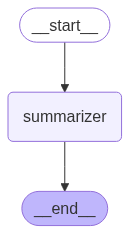

In [28]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image, display

display(
    Image(
        generate_dynamic_summary.get_graph().draw_mermaid_png(         
            draw_method=MermaidDrawMethod.API               
        )
    )
)

In [29]:
# Test dynamic summarization
print("\nDynamic Summarization Demo:")
print("-" * 50)

# Create a conversation that needs summarization
test_conversation = {
    "messages": [
        HumanMessage(content="What is LangGraph?"),
        AIMessage(content="LangGraph is a framework for building stateful applications with LLMs."),
        HumanMessage(content="Can it handle multiple agents?"),
        AIMessage(content="Yes, LangGraph supports multi-agent workflows and coordination."),
        HumanMessage(content="How does state management work?"),
        AIMessage(content="State is managed through TypedDict structures with proper annotations.")
    ],
    "summary": "Initial conversation about LangGraph",
    "window_size": 3
}

# Generate summary
result = summary_generation(test_conversation)

print(f"Message count: {len(result['messages'])}")
print(f"\nGenerated Summary:")
print(f"{result['summary']}")
print(f"\nSummary triggered at message count: {len(result['messages'])}")



Dynamic Summarization Demo:
--------------------------------------------------
Message count: 6

Generated Summary:
Conversation summary: What is LangGraph? -> LangGraph is a framework for building stateful applications with LLMs. -> Can it handle multiple agents? -> Yes, LangGraph supports multi-agent workflows and coordination. -> How does state management work? -> State is managed through TypedDict structures with proper annotations.

Summary triggered at message count: 6


## Key Takeaways

### Summary Management
- Use thresholds for efficient processing
- Maintain context through summarization  
- Integrate with message windowing

### State Handling
- Update summaries atomically
- Preserve message context
- Maintain state consistency

### Common Pitfalls
- Missing message validation
- Inefficient summary generation
- Poor summary format design
- Incomplete state updates

### Next Steps
- Add intelligent summary compression
- Implement topic extraction
- Add summary-based routing
- Integrate with LLM for better summaries

# Variations and Extensions

## Enhanced Summarization
- **LLM-based semantic summarization**: Use language models for context-aware summaries
- **Topic-based summary clustering**: Group related conversations by themes
- **Example use case**: Complex conversation tracking across multiple sessions

## Conditional Summarization  
- **Topic-based summary triggers**: Generate summaries when conversation topics shift
- **Importance-based summarization**: Prioritize key information in summaries
- **Scenario**: Adaptive conversation management for dynamic contexts

## Exercise 5: Building Advanced Multi-Node Message Processing Pipelines

Now let's combine everything we've learned to build a multi-node processing pipeline. This demonstrates how to create modular, scalable systems by combining specialized nodes.

### Pipeline Architecture:
1. **Message Processor**: Initial message handling
2. **Window Manager**: Memory optimization
3. **Summarizer**: Context preservation
4. **Response Generator**: Final output creation

### Benefits of Multi-Node Architecture:
- **Separation of Concerns**: Each node has a specific responsibility
- **Testability**: Individual nodes can be tested in isolation
- **Scalability**: Easy to add or modify nodes
- **Maintainability**: Clear, modular code structure


In [32]:
# Initialize pipeline graph

graph = StateGraph(State)

# Add processing nodes
graph.add_node("processor", process_message)
graph.add_node("windowing", message_windowing)
graph.add_node("summarizer", summary_generation)
# Configure pipeline flow
graph.add_edge(START, "processor")
graph.add_edge("processor", "windowing")
graph.add_edge("windowing", "summarizer")
graph.add_edge("summarizer", END)
# Compile for execution

pipeline = graph.compile()

In [33]:
# Test the complete pipeline
print("\nTesting Multi-Node Pipeline:")
print("=" * 60)

# Initialize conversation state
conversation_state = {
    "messages": [],
    "summary": "",
    "window_size": 3
}

# Simulate a conversation
test_messages = [
    "Hello! I'm interested in learning about LangGraph",
    "What are the key features of LangGraph?",
    "How does it compare to other frameworks?",
    "Can you show me a simple example?",
    "What about error handling?"
]

for i, user_msg in enumerate(test_messages):
    print(f"\n--- Turn {i+1} ---")
    print(f"User: {user_msg}")
    
    # Add user message to state
    conversation_state["messages"].append(HumanMessage(content=user_msg))
    
    # Process through pipeline
    result = pipeline.invoke(conversation_state)
    
    # Update conversation state
    conversation_state = result
    
    # Display the response
    if result["messages"]:
        last_msg = result["messages"][-1]
        if isinstance(last_msg, AIMessage):
            print(f"Assistant: {last_msg.content[:150]}...")
    
    print(f"\nState Info:")
    print(f"  Messages in memory: {len(result['messages'])}")
    print(f"  Summary length: {len(result['summary'])} chars")



Testing Multi-Node Pipeline:

--- Turn 1 ---
User: Hello! I'm interested in learning about LangGraph

State Info:
  Messages in memory: 1
  Summary length: 0 chars

--- Turn 2 ---
User: What are the key features of LangGraph?

State Info:
  Messages in memory: 2
  Summary length: 0 chars

--- Turn 3 ---
User: How does it compare to other frameworks?

State Info:
  Messages in memory: 3
  Summary length: 158 chars

--- Turn 4 ---
User: Can you show me a simple example?

State Info:
  Messages in memory: 4
  Summary length: 195 chars

--- Turn 5 ---
User: What about error handling?

State Info:
  Messages in memory: 5
  Summary length: 225 chars


## Putting It All Together: Production-Ready Patterns

Let's combine all the concepts into a production-ready conversational agent that demonstrates best practices for state management and multi-node processing.


### Window Manager


In [35]:
def manage_message_window(state: State) -> State:
    """
    Maintain optimal message history through window-based pruning.
    
    This function implements several key concepts:
    1. Automatic message pruning
    2. Window-based history management
    3. State preservation during updates
    
    Args:
        state: Current conversation state with messages and window configuration
        
    Returns:
        State: Updated state with windowed message history
    """
    current_window_size = state.get("window_size", 5)
    current_messages = state["messages"]
    
    # Check if pruning is needed
    if len(current_messages) > current_window_size:
        # Before pruning, update summary with older messages
        older_messages = current_messages[:-current_window_size]
        summary_addition = " Previous context: " + "; ".join([
            f"{type(msg).__name__}: {msg.content[:50]}..." 
            for msg in older_messages
        ])
        
        # Prune messages to window size
        pruned_messages = current_messages[-current_window_size:]
        
        # Update state with pruned messages and enhanced summary
        return {
            "messages": pruned_messages,
            "summary": state["summary"] + summary_addition,
            "window_size": current_window_size
        }
    
    # No pruning needed
    return state


### Dynamic summary
```bash

```

In [34]:
# Initialize LLM for summarization
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def generate_dynamic_summary(state: State) -> State:
    """
    Generate and maintain dynamic conversation summaries.
    
    This function implements:
    1. Threshold-based summary generation
    2. Context preservation through summarization
    3. Integration with LLM for intelligent summaries
    
    Args:
        state: Current conversation state
        
    Returns:
        State: Updated state with new summary
    """
    messages = state["messages"]
    
    # Only summarize if we have enough messages
    if len(messages) < 3:
        return state
    
    # Check if summary needs updating (every N messages)
    if len(messages) % 3 == 0:
        # Create conversation text for summarization
        conversation_text = "\n".join([
            f"{type(msg).__name__.replace('Message', '')}: {msg.content}"
            for msg in messages[-5:]  # Summarize last 5 messages
        ])
        
        # Use LLM to generate summary
        summary_prompt = PromptTemplate(
            input_variables=["conversation", "previous_summary"],
            template="""Based on the previous summary and recent conversation, create a concise updated summary.

Previous Summary: {previous_summary}

Recent Conversation:
{conversation}

Updated Summary (2-3 sentences):"""
        )
        
        summary_response = llm.invoke(
            summary_prompt.format(
                conversation=conversation_text,
                previous_summary=state.get("summary", "No previous summary")
            )
        )
        
        return {
            "messages": messages,
            "summary": summary_response.content,
            "window_size": state["window_size"]
        }
    
    return state


### Define nodes 


In [14]:
class ProductionState(TypedDict):
    """
    Production-ready state with comprehensive tracking.
    """
    messages: Annotated[list[BaseMessage], add_messages]
    summary: str
    window_size: int
    conversation_metadata: dict  # Track conversation metrics
    user_context: dict  # Store user preferences/info

def create_production_agent():
    """
    Create a production-ready conversational agent with all best practices.
    """
    graph = StateGraph(ProductionState)
    
    # Enhanced message processor with metadata tracking
    def enhanced_processor(state: ProductionState) -> ProductionState:
        """Process messages and update metadata."""
        metadata = state.get("conversation_metadata", {})
        metadata["total_messages"] = metadata.get("total_messages", 0) + 1
        metadata["last_updated"] = "now"
        
        # Extract user context from messages
        user_context = state.get("user_context", {})
        if state["messages"]:
            last_msg = state["messages"][-1]
            if isinstance(last_msg, HumanMessage):
                # Simple intent detection
                content_lower = last_msg.content.lower()
                if "my name is" in content_lower:
                    # Extract name (simplified)
                    words = last_msg.content.split()
                    if "is" in words:
                        idx = words.index("is")
                        if idx < len(words) - 1:
                            user_context["name"] = words[idx + 1].strip(".,!?")
        
        return {
            **state,
            "conversation_metadata": metadata,
            "user_context": user_context
        }
    
    # Smart response generator using all context
    def smart_response_generator(state: ProductionState) -> ProductionState:
        """Generate responses using full context."""
        last_msg = state["messages"][-1] if state["messages"] else None
        
        if isinstance(last_msg, HumanMessage):
            # Build comprehensive context
            context_parts = [
                f"Summary: {state.get('summary', 'No summary yet')}"
            ]
            
            # Add user context if available
            if state.get("user_context", {}).get("name"):
                context_parts.append(f"User name: {state['user_context']['name']}")
            
            # Add conversation metadata
            metadata = state.get("conversation_metadata", {})
            if metadata.get("total_messages"):
                context_parts.append(f"Messages exchanged: {metadata['total_messages']}")
            
            context_parts.append(f"User message: {last_msg.content}")
            
            full_context = "\n".join(context_parts)
            
            prompt = PromptTemplate(
                input_variables=["context"],
                template="""You are a helpful assistant. Use all available context to provide personalized responses.
                `
                Context:
                {context}

                Provide a helpful, personalized response:"""`
            )
            
            response = llm.invoke(prompt.format(context=full_context))
            
            return {
                **state,
                "messages": [AIMessage(content=response.content)]
            }
        
        return state
    
    # Add nodes
    graph.add_node("enhanced_processor", enhanced_processor)
    graph.add_node("window_manager", window_manager_node)
    graph.add_node("summarizer", summarizer_node)
    graph.add_node("smart_responder", smart_response_generator)
    
    # Define flow
    graph.add_edge(START, "enhanced_processor")
    graph.add_edge("enhanced_processor", "window_manager")
    graph.add_edge("window_manager", "summarizer")
    graph.add_edge("summarizer", "smart_responder")
    graph.add_edge("smart_responder", END)
    
    return graph.compile()

# Create production agent
production_agent = create_production_agent()


In [15]:
# Test the production agent
print("\nTesting Production Agent:")
print("=" * 60)

# Initialize state
prod_state = {
    "messages": [],
    "summary": "",
    "window_size": 4,
    "conversation_metadata": {},
    "user_context": {}
}

# Simulate a personalized conversation
production_messages = [
    "Hello! My name is Alex",
    "I want to learn about building agents with LangGraph",
    "What makes it different from regular chatbots?",
    "Can you give me a specific example?",
    "Thanks, this is really helpful!"
]

for i, msg in enumerate(production_messages):
    print(f"\n--- Turn {i+1} ---")
    print(f"User: {msg}")
    
    # Add message and process
    prod_state["messages"].append(HumanMessage(content=msg))
    result = production_agent.invoke(prod_state)
    prod_state = result
    
    # Show response
    if result["messages"]:
        last_msg = result["messages"][-1]
        if isinstance(last_msg, AIMessage):
            print(f"Assistant: {last_msg.content[:200]}...")
    
    # Show enhanced state info
    print(f"\nEnhanced State:")
    print(f"  Window: {len(result['messages'])}/{result['window_size']}")
    print(f"  User Context: {result.get('user_context', {})}")
    print(f"  Metadata: {result.get('conversation_metadata', {})}")



Testing Production Agent:

--- Turn 1 ---
User: Hello! My name is Alex
[Window Manager] Current messages: 1, Window: 4
Assistant: Hello, Alex! It's great to meet you! How can I assist you today? If there's anything specific you'd like to talk about or any questions you have, feel free to share!...

Enhanced State:
  Window: 2/4
  User Context: {'name': 'Alex'}
  Metadata: {'total_messages': 1, 'last_updated': 'now'}

--- Turn 2 ---
User: I want to learn about building agents with LangGraph
[Window Manager] Current messages: 3, Window: 4
[Summarizer] Generating summary for 3 messages
Assistant: Hi Alex! I'm excited to help you learn about building agents with LangGraph. To get started, it would be helpful to know what specific aspects you're interested in. Are you looking for an overview of ...

Enhanced State:
  Window: 4/4
  User Context: {'name': 'Alex'}
  Metadata: {'total_messages': 2, 'last_updated': 'now'}

--- Turn 3 ---
User: What makes it different from regular chatbots?
[Win